# Dissonance curve

In [4]:
%pip install dissonant
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 43.9 MB 55.3 MB/s eta 0:00:01    |████████████████████████▊       | 33.9 MB 867 kB/s eta 0:00:12
Note: you may need to restart the kernel to use updated packages.


In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelmin

import dissonant as D

In [17]:

# math function:
def freq_space(base_f=440, octaves=4, steps=1000): # a function with all of the veriables that are necerssary for it.
    ratios = np.linspace(1, octaves, steps) # declares ratio to be equall to an array that consists of 1000 steps that go through a range of 3 octaves (1-4).
    freqs = base_f * ratios # this line says that the veriable freqs is equall to base_f(440) * ration(all of the array).
    return freqs 

# main dissonant library function:
def dissonance_curve(freq_space, n_partials=10, model='sethares1993'):# a function with all of the veriables that are necerssary for it.
    dissonances = [] # the value of how dissonance is the frequencies are together (creats an array of all of the frequencies compared).
    for freq in freq_space: # to every freeq that is in the array of the first function (freq_space) : 
        print("tone 1:", freq_space[0],"tone 2:", freq)
        h_freqs, h_amps = D.harmonic_tone([freq_space[0], freq], n_partials=n_partials) 
        # the function harmonic_tone() takes the first number in the array of freq_space (440 hz),
        # then takes the next number in the array and dvides each to ten partials so you get an array of each of both frequencies,
        # then the function puts out.
        print("f1 :", h_freqs[0]) # prints out the first frequecy in the array h_freq.
        print("f2 :", h_freqs[1]) # prints out the second frequecy in the array h_freq.
        print("a1 :", h_amps[0]) # prints out the first amplitude in the array h_amps.
        print("a2 :", h_amps[1]) # prints out the second amplitude in the array h_amps.
        print("freqs:",h_freqs.shape) # print out how many arrays are being compared and how many part of them are getting compared 
        print("amps:",h_amps.shape) # print out how many arrays are being compared and how many part of them are getting compared 
        d = D.dissonance(h_freqs, h_amps, model=model)
        # the function dissonant() Computes dissonance score for chord composed of muliple frequences, 
        # each possible with different amplitudes using a given dissonance model.
        dissonances.append(d) # puts the "d" array in he dissonances array.
        print("d(", freq, "): " , d) # prints out the "d" for each frequency.
        print("---------------------------------------------------------------")
    dissonances = np.array(dissonances) # the variable "dissonances" is equal to the array of it.
    return dissonances 

# math and graphics plotng function:
def plot_dissonance_curve(freqs, dissonances): # a function with freqs and dissonances as its variables.
    minima = argrelmin(dissonances)[0] # i need help with this function.

    plt.figure(figsize=(16, 3)) #  creates a new figure (graph) with the specfied sizing.
    plt.xlim(freqs[0], freqs[-1]) # claims that the x axis of the graph will be from the first(440hz) to the last(1760hz) number in the array freq.
    plt.plot(freqs, dissonances) # plots the x axis as fr and the y axis as dissonances.
    for m in minima:
        plt.axvline(freqs[m], c='r', ls=':')
    plt.xlabel('frequency') # labels the x axis as frequency.
    plt.ylabel('dissonance') # labels the y axis as dissonances.
    plt.savefig('my_plot_dissonance.png') # saves the image.

**************************************************************
tone 1: 440.0 tone 2: 440.0
f1 : [ 440.  880. 1320. 1760. 2200. 2640. 3080. 3520. 3960. 4400.]
f2 : [ 440.  880. 1320. 1760. 2200. 2640. 3080. 3520. 3960. 4400.]
a1 : [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
 0.4086756  0.35963452 0.31647838 0.27850098]
a2 : [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
 0.4086756  0.35963452 0.31647838 0.27850098]
freqs: (2, 10)
amps: (2, 10)
d( 4.4e+02 ):  0.03246273681162782
---------------------------------------------------------------
tone 1: 440.0 tone 2: 441.32132132132136
f1 : [ 440.  880. 1320. 1760. 2200. 2640. 3080. 3520. 3960. 4400.]
f2 : [ 441.32132132  882.64264264 1323.96396396 1765.28528529 2206.60660661
 2647.92792793 3089.24924925 3530.57057057 3971.89189189 4413.21321321]
a1 : [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
 0.4086756  0.35963452 0.31647838 0.27850098]
a2 : [0.88       0.7744     0.681472 

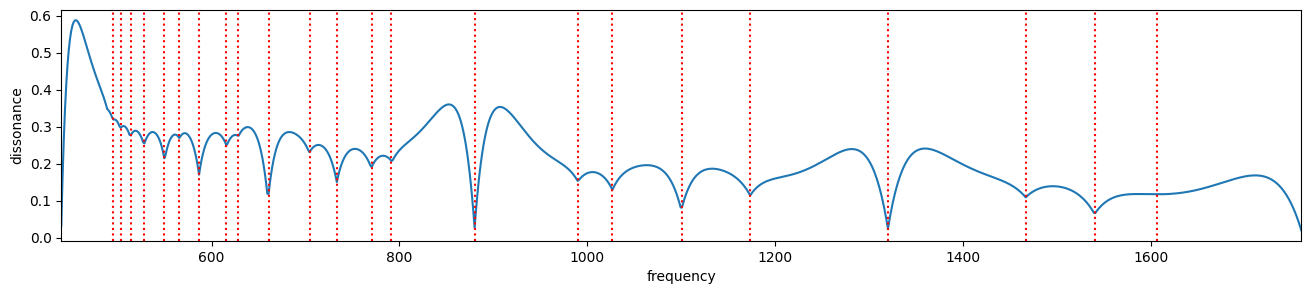

In [18]:
print("**************************************************************")
freqs_space = freq_space() # freq_space equals to the function of freq_space().
dissonances = dissonance_curve(freqs_space, n_partials=10, model='sethares1993') # dissonance is equal to the function dissonance_curve().
plot_dissonance_curve(freqs_space,dissonances ) # the function plot_dissonance_curve() is executed with the variables freqs_space and dissonances.
print("min_d: ",min(dissonances)) # prints the min number in the array dissonances.
print("max_d: ",max(dissonances)) # prints the max number in the array dissonances.
print("min_f:",min(freqs_space)) # prints the min number in the array freqs_space.
print("max_f:",max(freqs_space)) # prints the max number in the array freqs_space.


# Changing number of partials

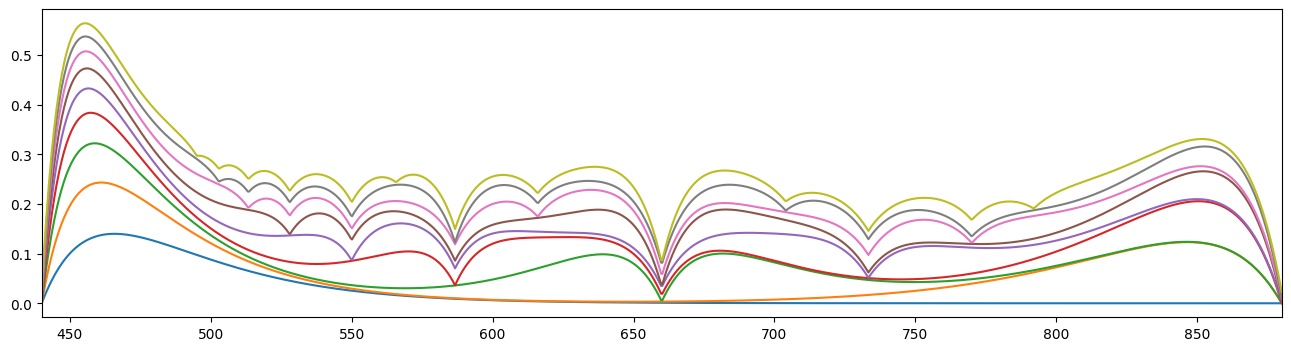

In [12]:
plt.figure(figsize=(16, 4))
for n_partials in range(1, 10):
    dissonances = []
    base_f = D.pitch_to_freq(0)
    ratios = np.linspace(1, 2, 1000)
    freqs = base_f * ratios
    for ratio in ratios:
        h_freqs, h_amps = D.harmonic_tone(base_f * np.array([1, ratio]), n_partials=n_partials)
        d = D.dissonance(h_freqs, h_amps, model='sethares1993')
        dissonances.append(d)
    dissonances = np.array(dissonances)

    minima = argrelmin(dissonances)[0]

    plt.xlim(freqs[0], freqs[-1])
    plt.plot(freqs, dissonances)